### 線形回帰モデルのフルスクラッチ


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### データセットの用意

In [2]:
df = pd.read_csv("./train.csv")
df =df[['SalePrice','GrLivArea','YearBuilt']]
df.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


In [3]:
X = df[['GrLivArea','YearBuilt']].values
y = df[['SalePrice']].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### テストデータの分割
train.csvを学習用（train）8割、検証用（val）2割に分割する

In [5]:
def train_test_split(X, y, train_size):
    """
    学習用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    pass
    train_num  = np.fix(len(X) * train_size)
    test_num = len(X) - train_num
    X_len = len(X)
    Xy = pd.concat([X, y])
    Xy.take(np.random.permutation(len(Xy)))
    X = Xy[:1]
#     y =
    X_train = 1
    X_test =1
    y_train =1
    y_test =1
    
#     return X_train, X_test, y_train, y_test
    return 

In [6]:
SalePrice =df['SalePrice']
GrLivArea =df['GrLivArea']
YearBuilt =df['YearBuilt']

### プロット

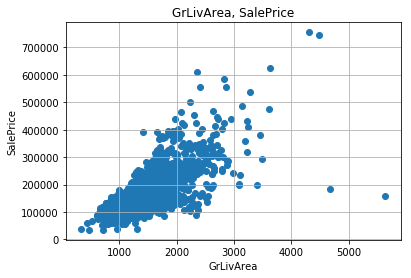

In [7]:
plt.scatter(GrLivArea, SalePrice)
plt.title("GrLivArea, SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid(True)

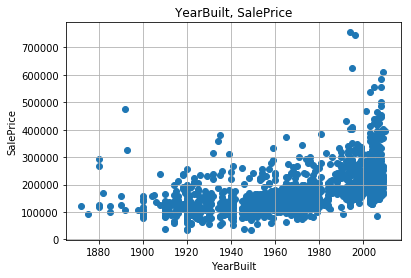

In [8]:
plt.scatter(YearBuilt, SalePrice)
plt.title("YearBuilt, SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid(True)

目的変数と説明変数間には正の相関があることが分かる

In [9]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

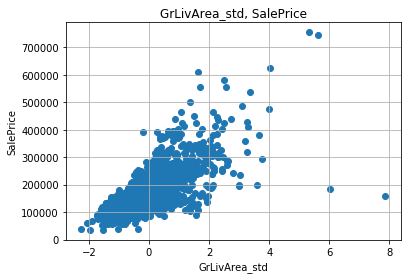

In [10]:
GrLivArea_std = stdsc.fit_transform(GrLivArea.values.reshape(-1,1))
plt.scatter(GrLivArea_std, SalePrice)
plt.title("GrLivArea_std, SalePrice")
plt.xlabel("GrLivArea_std")
plt.ylabel("SalePrice")
plt.grid(True)

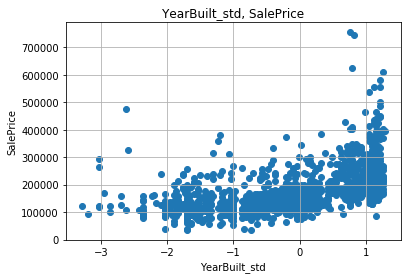

In [11]:
YearBuilt_std = stdsc.fit_transform(YearBuilt.values.reshape(-1,1))
plt.scatter(YearBuilt_std, SalePrice)
plt.title("YearBuilt_std, SalePrice")
plt.xlabel("YearBuilt_std")
plt.ylabel("SalePrice")
plt.grid(True)

In [12]:
def hypo(X,  theta):
    h = np.dot(X, theta)
    return h

def compute_cost(h, y):
    cost = 0.5 * np.sum((h -y) **2)
    return cost

def gradient_descent(X, y, iterations, alpha):
    """
    args:
      alpha: Step size/Learning rate
      iterations: No. of iterations(Number of iterations)
    """
    theta = np.random.rand(2,1)
    past_costs = []
    past_thetas = [theta]   
     
    for i in range(iterations):
        h = hypo(X, theta)
        cost = compute_cost(h, y)
        past_costs.append(cost)
        
        theta = theta - alpha * np.dot(X.T, (h - y))
        #print(h.shape,X.shape)
        past_thetas.append(theta)
    
    plt.plot(past_costs )
    plt.show()

### 線形回帰のクラスを作成する

In [13]:
class ScratchLinearRegression():
    """
    線形回帰
    ＊コンストラクタ（__init__）のパラメータはここに書いておくと分かりやすい

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = []
        self.val_loss = []
        #学習したthetaを保持する
        self.theta = np.random.rand(2,1)

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        hypothesis = np.dot(X, self.theta)
        return hypothesis

    def _compute_cost(self, h, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値

        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        cost = 0.5 * np.sum((h -y) **2)
        return cost

    def _gradient_descent(self, X, y):
        """
        説明を記述
        """
        ##コストの推移の記録のためのコードをコメントアウトしています。
#         past_costs = []
        
        for i in range(self.iter):
            h = self._linear_hypothesis(X)
            cost = self._compute_cost(h, y)
#             past_costs.append(cost)
            self.theta = self.theta - self.lr * np.dot(X.T, (h - y))
#         plt.plot(past_costs )
#         plt.show()
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self._gradient_descent(X, y)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        return self._linear_hypothesis(X)

In [14]:
SLR =  ScratchLinearRegression(1000, 1e-13, 0, False)

In [15]:
SLR._gradient_descent(X, y)

In [16]:
SLR.theta

array([[ 29.8708536 ],
       [ 33.88085329]])

In [17]:
SLR.fit(X_train, y_train)

In [18]:
SLR.predict(X_test)

array([[ 131555.61294959],
       [ 195891.97594267],
       [ 128316.16029984],
       [ 154975.80889239],
       [ 155892.54456643],
       [ 114220.05084235],
       [ 166361.88141254],
       [ 147945.56624891],
       [ 114130.08832049],
       [ 144359.29681894],
       [ 146547.07001185],
       [ 123922.90206158],
       [ 123248.58407895],
       [ 152314.83036417],
       [ 158412.8984383 ],
       [ 128675.60945594],
       [ 159807.91892419],
       [ 134093.87913956],
       [ 127353.24057083],
       [ 150001.67094452],
       [ 161055.56371707],
       [ 154722.4303852 ],
       [ 149970.12392217],
       [ 125894.32417754],
       [ 147877.59319333],
       [ 138210.96754166],
       [ 144551.65377288],
       [ 122753.18881168],
       [ 154794.68105463],
       [ 144992.71068882],
       [ 136534.22897698],
       [ 172966.97480146],
       [ 212526.35159012],
       [ 126542.37508003],
       [ 156495.61420799],
       [ 134399.79180703],
       [ 164831.51621251],
 

### 説明するもの

### 教師あり学習
教師あり学習とは、機械学習の手法の一つである。事前に与えられたデータをいわば「例題（＝先生からの助言）」とみなして、それをガイドに学習（＝データへの何らかのフィッティング）を行うところからこの名がある。

### 分類問題
「分類問題」とは，データをそれぞれカテゴリに分類するもので，機械学習の代表的な使い道の一つである。
例えばメールをスパムと非スパムに分類したり，文中の単語に名詞や動詞などの品詞ラベルを割り振ったり，Webページの内容に応じて「スポーツ」や「政治」などのジャンルに分類したりするのもすべて分類問題と見なすことで，機械学習を使って解くことができるようになる。
「分類」に雰囲気のよく似た言葉として「クラスタリング」というものもあるが，機械学習の分野ではその2つは明確に区別していいる。
「分類問題」では，データをどのようなカテゴリーに分けるかは問題を解きたい人が指定している。したがって学習用のデータには正解カテゴリーがラベルとして割り振られており，それを使って「このカテゴリに属するデータはどのようなものか」を学習する。
一方の「クラスタリング」では，一般に問題を解きたい人がカテゴリを明示的に与えることはでない。できることは「2つのデータがこういう関係を満たしていれば似ているとする」といった条件と，データ全体をいくつのかたまり（クラスタ）に分割するのかを決めることだけである⁠。

### 回帰問題
回帰とは、株価分析のように、連続するデータの予測を行うときなどに使用する。
主に数値を扱うときである。
例えば、そのデータの特徴量の傾向をみて(座標上に線を書いて)、具体的な数字を出す（線上から割り出す）、予測するのが回帰である。

### 教師なし学習
教師なし学習は、学習対象のデータはあるが、それが何かという正解（文脈によってはラベル、教師信号ともいう）は与えられていないので、どうにかしてなにかしらの構造や法則を見出すための手法である。
大抵の場合、クラスタリング系のアルゴリズムを扱うことが多い。

### フィーチャースケーリング
再急降下法では最小二乗法の最小値を求める必要がある。そのとき特徴量に対して、ある幅で最小値に近づいていく(収束する)必要があるが、その特徴量の範囲がそれぞれ異なると時間がかかってしまう。そのため、特徴量の範囲を調整することをfeature scaling(フィーチャースケーリング)と言い、それによって処理時間を短くすることができる。

### 正規化
正規化には二種類ある 一つは最大値を1、最小値を0にする正規化である。データXが与えられたとき、
Y=X−xminxmax−xmin
Y=X−xminxmax−xmin
 
と変換すると、Y の最大値は 1、最小値は 0 になる。

もう一つは平均を0、分散を1にする正規化(標準化)である。データXが与えられたとき、
Y=X−μσ
Y=X−μσ
 
と変換すると、Yの平均は0、分散（および標準偏差）は1となる。

### $\theta_0$の役割
線形回帰の直線はy=b0+b1xy=b0+b1xという方程式で表すことができる。b0b0はy切片を表し、b1b1は傾きを表す。
線形回帰モデルに出てくるθ0θ0は直線の切片を示している。

例として、ある会社が、生産部門で働く従業員の業務遂行能力をy=130+4.3xy=130+4.3xという回帰モデルを使用して予測できると判断したとする。ここで、xxは従業員が受ける社内教育の時間（0～20）を表し、yyは職業技能検定での従業員のスコアを表す。yy切片の値（130）は、社内教育を受けていない従業員の平均職業技能スコアを示している。傾きの値（4.3）は、社内教育の時間が増えるごとに、職業技能スコアが平均で4.3ポイント増加することを示している。

上記の例からわかるように説明変数の値が00のときの目的変数の値が切片θ0θ0に変換する。

### 学習率
モデルの適合性を理解することは、モデルの精度が悪いという問題の根本的な原因を理解する上で重要である。トレーニングデータと評価データの予測エラーを見て、予測モデルがトレーニングデータに対してアンダーフィットかオーバーフィットかを判断できまる。

トレーニングデータでのモデルのパフォーマンスが悪いときは、モデルがトレーニングデータにアンダーフィットしている。これは、モデルが入力例 (X と呼ばれることが多い) とターゲット値 (Y と呼ばれることが多い) の関係をキャプチャできないことが原因である。トレーニングデータでのモデルのパフォーマンスがよくても、評価データでのパフォーマンスはよくないことが観察される場合、モデルがトレーニングデータにオーバーフィットしている。これは、モデルが見たデータを記憶していて、見ていない例に対して一般化できないことが原因である。

トレーニングデータでのパフォーマンスが悪い原因は、モデルがターゲットを説明するには単純すぎる (入力機能が十分に説明されていない) ことである可能性がある。モデルの柔軟性を高めることで、パフォーマンスを改善できる。モデルの柔軟性を高めるには、次の操作を試してください。

使用する正則化の量を減らす
モデルがトレーニングデータにオーバーフィットしている場合は、モデルの柔軟性を低下させる措置を取るのが適切である。モデルの柔軟性を低下させるには、次の操作を試してください。

使用する正則化の量を増やす。
学習アルゴリズムに学習するのに十分なデータがないため、トレーニングデータとテストデータの精度が悪くなることがあります。次の手順を実行してパフォーマンスを向上させることができます。

トレーニングデータの例の量を増やす。
既存のトレーニングデータのパスの数を増やす。

### 最急降下法(勾配降下法、GradientDescent)
最急降下法は、関数（ポテンシャル面）の傾き（一階微分）のみから、関数の最小値を探索する連続最適化問題の勾配法のアルゴリズムの一つ。勾配法としては最も単純であり、直接・間接にこのアルゴリズムを使用している場合は多い。最急降下法をオンライン学習に改良した物を確率的勾配降下法と呼ぶ。


$\theta_j := \theta_j - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^m[(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)} ]$

## 正規方程式
Xを行列、β,yを縦ベクトルとし、∥⋅∥をノルムとする。またXTをXの転置行列とする。XTXが正則なとき, S(β)=∥Xβ−y∥2つまり∥Xβ−y∥を最小にするβはただ1つ存在し、それは、正規方程式： 
$$X^{T}X^{β}=X^{T}y$$
の解である。 
∥Xβ−y∥=0, すなわちXβ=yとなる解が見つかればよい(→補足1)のですが、見つからないときでもこの定理により、∥Xβ−y∥を最小にするようなβを見つけられます。 正規方程式はXβ=yの両辺に左からXTを掛けたものですが、このことを用いて正規方程式を覚えるのがオススメです。

### 学習曲線
訓練データサイズを横軸に推論誤差あるいは推論精度をプロットした曲線を学習曲線という。一般論として推論精度は訓練データサイズに対して比例しない。ある程度のサイズがないと推論精度は向上しないし、ある程度以上の訓練データ量になると対数関数の様に訓練データサイズに対しての推論精度の向上率は鈍化する。